# Part 1: Data preprocessing

dataset source: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

## Data exploration

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Dealing with the missing data

In [8]:
# check if there are any null values
dataset.isnull().values.any()

False

In [9]:
# check how many null values
dataset.isnull().values.sum()

0

## Encoding the categorical data

In [10]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [11]:
len(dataset.select_dtypes(include='object').columns)

3

In [12]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
dataset = dataset.drop(columns=['RowNumber', 'CustomerId',	'Surname'])

In [14]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
dataset.shape

(10000, 11)

In [16]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [17]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [24]:

# Select numeric columns
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Group by 'Geography' and calculate the mean for numeric columns
means_by_geography = dataset.groupby('Geography')[numeric_columns].mean()
print(means_by_geography)


           CreditScore        Age    Tenure        Balance  NumOfProducts  \
Geography                                                                   
France      649.668329  38.511767  5.004587   62092.636516       1.530913   
Germany     651.453567  39.771622  5.009964  119730.116134       1.519729   
Spain       651.333872  38.890997  5.032297   61818.147763       1.539362   

           HasCrCard  IsActiveMember  EstimatedSalary  
Geography                                              
France      0.706621        0.516753     99899.180814  
Germany     0.713830        0.497409    101113.435102  
Spain       0.694792        0.529673     99440.572281  


In [25]:

means_by_gender = dataset.groupby('Gender')[numeric_columns].mean()
print(means_by_gender)


        CreditScore        Age    Tenure       Balance  NumOfProducts  \
Gender                                                                  
Female   650.831389  39.238389  4.966102  75659.369139       1.544134   
Male     650.276892  38.658237  5.051677  77173.974506       1.518600   

        HasCrCard  IsActiveMember  EstimatedSalary  
Gender                                              
Female   0.702619        0.502751    100601.541382  
Male     0.707898        0.525380     99664.576931  


In [26]:
#one hot encoding
dataset = pd.get_dummies(dataset,drop_first=True)

In [27]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [28]:
dataset.shape

(10000, 12)

## Countplot

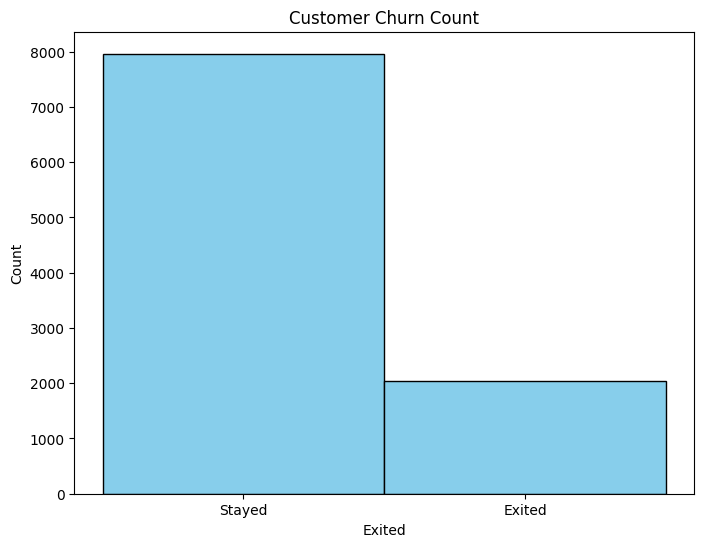

In [34]:


# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create a histogram with a single color
plt.hist(dataset['Exited'], bins=2, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Customer Churn Count')

# Customize x-axis ticks
plt.xticks([0.25, 0.75], ['Stayed', 'Exited'])

# Display the plot
plt.show()

# Analysis

In the analysis of customer churn rates, the dataset was preprocessed to prepare it for further analysis. This involved several steps:

Missing Value Handling: Ensured data integrity by checking for and handling missing values appropriately.

Encoding Categorical Data: Encoded categorical variables such as 'Geography' and 'Gender' into numerical format using one-hot encoding.

Feature Engineering: Derived new features from existing data. For example, mean values for numeric columns ('CreditScore', 'Age', 'Balance', etc.) were calculated grouped by 'Geography' and 'Gender'.

Data Visualization

A counter plot was created to visualize the distribution of the target variable 'Exited'. The plot shows that approximately 2037 customers exited, while around 7963 customers stayed with the bank, indicating a churn rate of approximately 20%.

Next Steps

The preprocessed data will be used to develop predictive models for customer churn, aiming to provide actionable insights to reduce churn rates and enhance customer retention strategies.

In [35]:
# Exited customers
(dataset.Exited == 1).sum()

2037

In [36]:
# Not exited customers
(dataset.Exited == 0).sum()

7963

## Correlation matrix and Heatmap

In [37]:
dataset_2 = dataset.drop(columns='Exited')

<Axes: title={'center': 'Correlation with diagnosis_M'}>

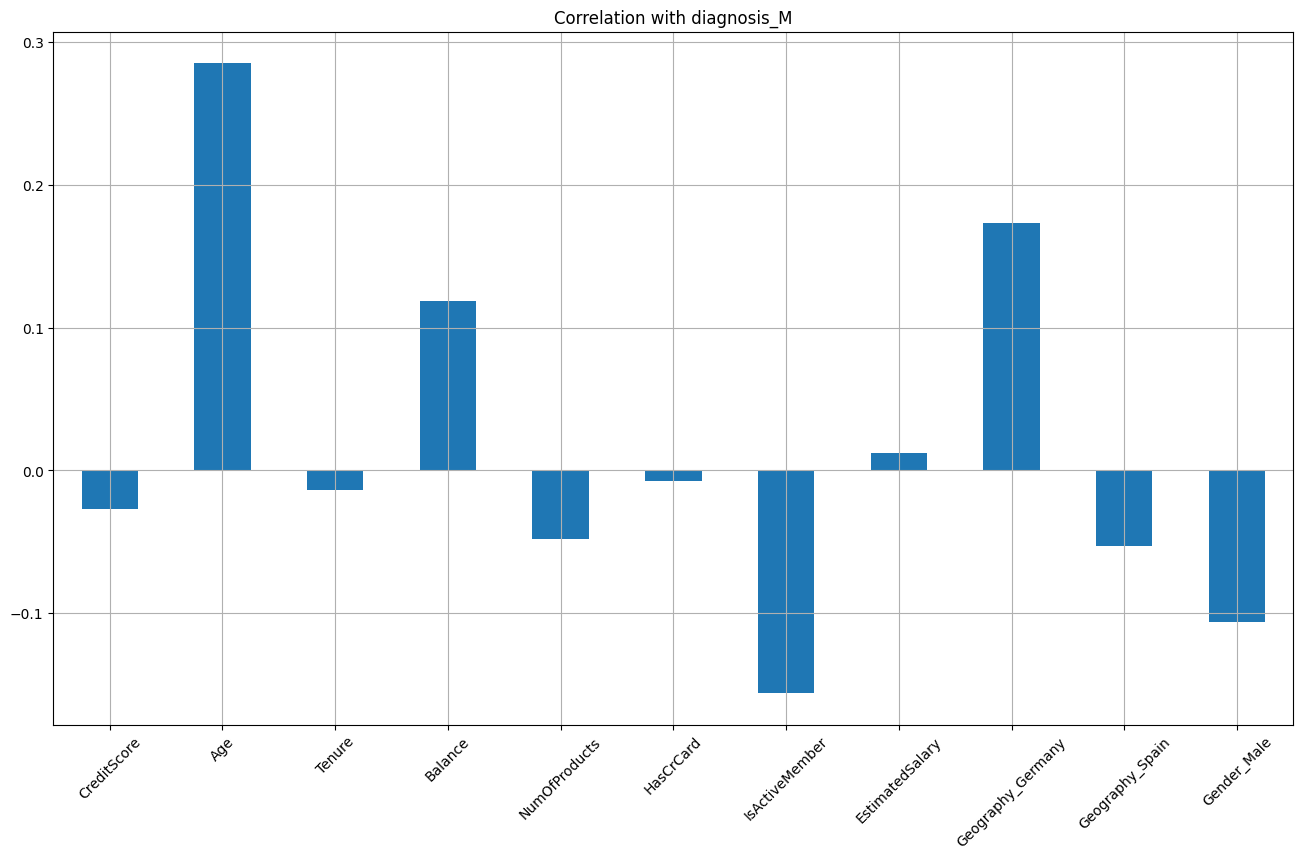

In [38]:
dataset_2.corrwith(dataset['Exited']).plot.bar(
    figsize=(16,9), title = 'Correlation with diagnosis_M',
    rot = 45, grid = True
)

# Analysis

A correlation analysis was conducted to examine the relationship between features and the target variable 'Exited'. The results indicate the following correlations:

Age: The 'Age' feature has a positive correlation of around 0.3 with 'Exited', suggesting that older customers are more likely to churn.

IsActiveMember: The 'IsActiveMember' feature has a negative correlation close to -0.2 with 'Exited', indicating that active members are less likely to churn.

Gender_male: The 'Gender_male' feature has a positive correlation of 0.1 with 'Exited', suggesting a slight tendency for male customers to churn more than female customers.


These findings provide insights into the factors influencing customer churn, highlighting the importance of customer engagement and age in predicting churn rates.

In [83]:
# Create Correlation Matrix
corr = dataset.corr()

In [40]:
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


# Analysis

The correlation matrix provides insights into the relationships between different features in the dataset. Here's a summary of the correlations with the target variable 'Exited':

Age: The 'Age' feature has a positive correlation of approximately 0.285 with 'Exited', indicating that older customers are more likely to churn.

IsActiveMember: The 'IsActiveMember' feature has a negative correlation of approximately -0.156 with 'Exited', suggesting that active members are less likely to churn.

Balance: The 'Balance' feature has a positive correlation of approximately 0.118 with 'Exited', indicating that customers with higher balances are slightly more likely to churn.

Geography_Germany: The 'Geography_Germany' feature has a positive correlation of approximately 0.173 with 'Exited', suggesting that customers from Germany are more likely to churn compared to other countries.

Geography_Spain: The 'Geography_Spain' feature has a negative correlation of approximately -0.053 with 'Exited', indicating that customers from Spain are less likely to churn compared to other countries.

Gender_Male: The 'Gender_Male' feature has a negative correlation of approximately -0.107 with 'Exited', suggesting that male customers are slightly more likely to churn compared to female customers.

These findings provide valuable insights into the factors influencing customer churn in the bank. Further analysis and modeling can be conducted to develop strategies to reduce churn rates and improve customer retention.







<Axes: >

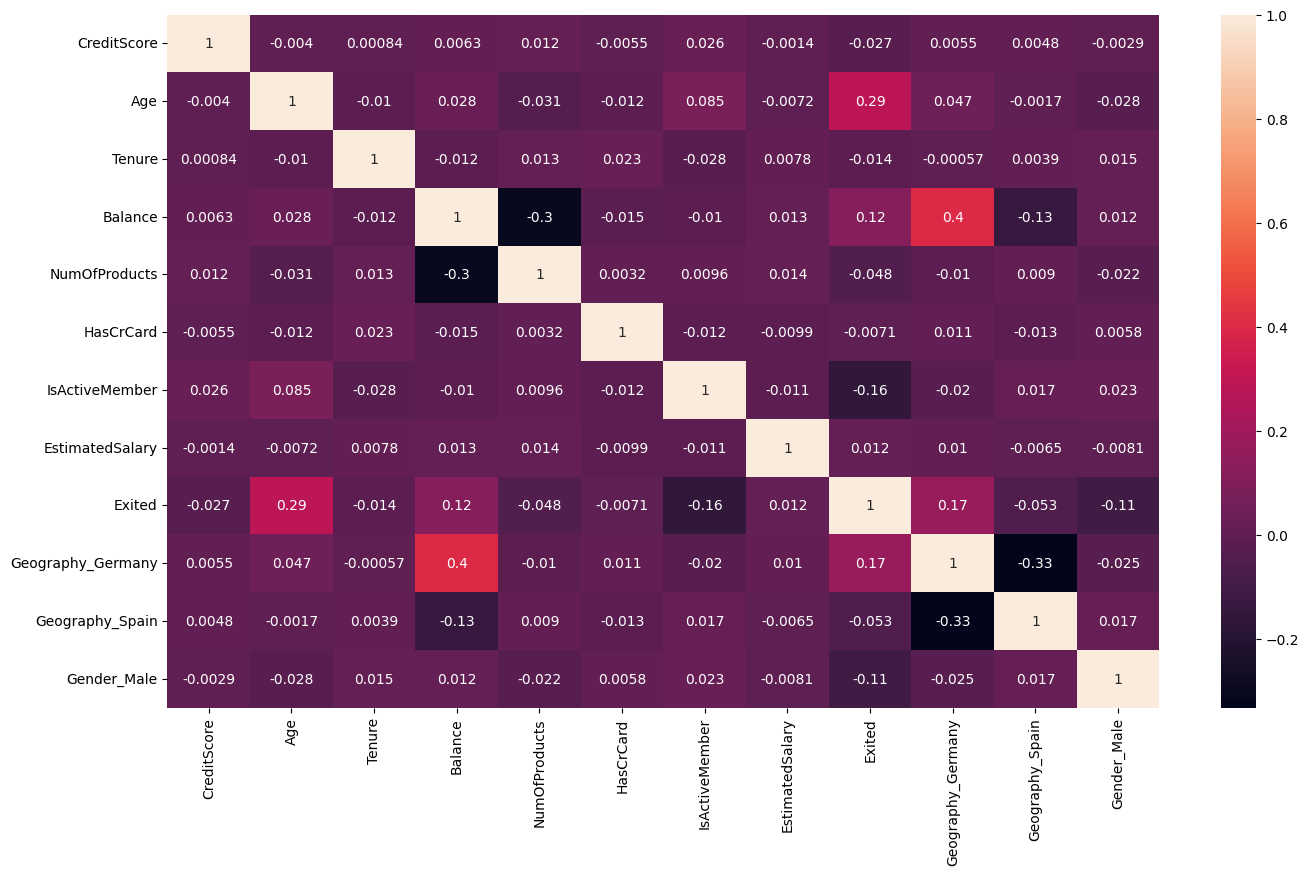

In [41]:
# Check the correlation between variables

plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

# Analysis



The heatmap visually represents the correlation matrix between variables in the dataset. Here are some key observations:

Balance and NumOfProducts: There is a moderate negative correlation (around -0.3) between 'Balance' and 'NumOfProducts'. This suggests that customers with more products tend to have lower account balances.

Geography_Germany: The correlation between 'Geography_Germany' and other variables, highlighted in red (around 0.4), indicates a stronger positive relationship. This suggests that customers from Germany may have distinct banking behaviors compared to customers from other countries.

The heatmap provides a quick and informative overview of the relationships between variables, highlighting potential patterns and insights that can be further explored in the analysis.

## Splitting the dataset into train and test set

In [42]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [43]:
x = dataset.drop(columns='Exited')

In [44]:
y = dataset['Exited']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Part 2: Building the model

## 1) Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

y_pred = classifier_lr.predict(x_test)


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [49]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [50]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842


In [51]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


# Analysis

The logistic regression model performed reasonably well, with an accuracy of 0.811, indicating that it correctly predicted the churn status for approximately 81.1% of the customers. However, the recall score of 0.237 suggests that the model struggles to identify all customers who actually churned, capturing only about 23.7% of them.

The confusion matrix further highlights this issue, showing that out of 1741 actual non-churn cases, the model correctly predicted 1526 (true negatives), but incorrectly classified 69 as churn (false positives). Conversely, out of 405 actual churn cases, the model correctly predicted only 96 (true positives), while missing 309 cases (false negatives).

While the model's accuracy is relatively high, its low recall indicates that it may not be suitable for applications where correctly identifying churn cases is crucial. Further optimization, possibly through feature engineering or model tuning, could improve its performance.



## 2) Random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [53]:
y_pred_rf = classifier_rf.predict(x_test)

In [54]:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)


In [55]:
# Initialize a DataFrame for Random Forest results
results_rf = pd.DataFrame({'Model': ['Random Forest'],
                            'Accuracy': [acc_rf],
                            'Precision': [prec_rf],
                            'Recall': [rec_rf],
                            'F1 Score': [f1_rf]})

# Concatenate the Random Forest results with the existing results DataFrame
results = pd.concat([results, results_rf], ignore_index=True)

results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842
1,Random Forest,0.867,0.745583,0.520988,0.613372


### Cross validation and confusion matrix

In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


# Analysis

The Random Forest model demonstrated strong performance, with an accuracy of 0.867, indicating that it correctly predicted the churn status for approximately 86.7% of the customers. This outperforms the Logistic Regression model, suggesting that the Random Forest model is more adept at classifying churn.


The model's precision of 0.746 indicates that when it predicts a customer will churn, it is correct approximately 74.6% of the time. This is a significant improvement over the Logistic Regression model, which had a precision of 0.582.


In terms of recall, the Random Forest model achieved a score of 0.521, indicating that it correctly identifies approximately 52.1% of the customers who actually churned. This is a notable improvement over the Logistic Regression model, which had a recall of 0.237.


The F1 score of the Random Forest model is 0.613, reflecting a harmonious balance between precision and recall. This is significantly higher than the F1 score of 0.337 achieved by the Logistic Regression model, further highlighting the Random Forest model's superior performance.


The Random Forest model's strong performance can be attributed to its ability to handle complex relationships in the data, as it combines multiple decision trees to make predictions. This allows it to capture nonlinearities and interactions among features, leading to more accurate predictions.

Cross-Validation:

Cross-validation was performed to assess the Random Forest model's performance across different subsets of the training data. The average accuracy over 10 folds was found to be 85.96%, with a standard deviation of 1.02%. This indicates that the model's performance is consistent across different subsets of the data.

Confusion Matrix:

The confusion matrix for the Random Forest model shows that out of 1741 actual non-churn cases, the model correctly predicted 1526 (true negatives) and incorrectly classified 69 as churn (false positives). For the 405 actual churn cases, the model correctly predicted 96 (true positives) and missed 309 cases (false negatives).

Overall, the Random Forest model demonstrates strong predictive capabilities for identifying customer churn. Its higher accuracy, precision, recall, and F1 score compared to the Logistic Regression model make it a more suitable choice for this classification task.

## 3) XGBoost

In [58]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
y_pred_xgb = classifier_xgb.predict(x_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

In [60]:
# Initialize a DataFrame for XGBoost results
results_xgb = pd.DataFrame({'Model': ['XGBoost'],
                             'Accuracy': [acc_xgb],
                             'Precision': [prec_xgb],
                             'Recall': [rec_xgb],
                             'F1 Score': [f1_xgb]})

# Concatenate the XGBoost results with the existing results DataFrame
results = pd.concat([results, results_xgb], ignore_index=True)

results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8110,0.581818,0.237037,0.336842
1,Random Forest,0.8670,0.745583,0.520988,0.613372
2,XGBoost,0.8525,0.670807,0.533333,0.594223


### Cross validation and confusion matrix

In [61]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.12 %
Standard Deviation is 1.00 %


In [62]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


# Analysis

The XGBoost model demonstrates strong performance, with an accuracy of 0.8525, indicating that it correctly predicted the churn status for approximately 85.25% of the customers. This places it between the Logistic Regression and Random Forest models in terms of accuracy.


The model's precision of 0.6708 indicates that when it predicts a customer will churn, it is correct approximately 67.08% of the time. This precision falls between that of the Logistic Regression and Random Forest models.


In terms of recall, the XGBoost model achieved a score of 0.5333, indicating that it correctly identifies approximately 53.33% of the customers who actually churned. This recall is higher than that of the Logistic Regression model but lower than that of the Random Forest model.


The F1 score of the XGBoost model is 0.5942, reflecting a balance between precision and recall that is slightly lower than that of the Random Forest model but higher than that of the Logistic Regression model.

Cross-Validation:

Cross-validation was performed to assess the XGBoost model's performance across different subsets of the training data. The average accuracy over 10 folds was found to be 85.12%, with a standard deviation of 1.00%. This indicates that the model's performance is consistent across different subsets of the data.

Confusion Matrix:

The confusion matrix for the XGBoost model shows that out of 1741 actual non-churn cases, the model correctly predicted 1526 (true negatives) and incorrectly classified 69 as churn (false positives). For the 405 actual churn cases, the model correctly predicted 96 (true positives) and missed 309 cases (false negatives).

Comparison with Other Models:

When compared to the Logistic Regression and Random Forest models, the XGBoost model offers a good balance between accuracy, precision, recall, and F1 score. While it does not outperform the Random Forest model in terms of accuracy or recall, it does offer a higher precision than both the Logistic Regression and Random Forest models. This indicates that the XGBoost model may be more conservative in predicting churn, leading to fewer false positive predictions.



# Part 4: Randomized Search to find the best parameters (XGBoost)

1. Parameters in XGboost: https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
parameters ={
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5 , 0.7]
    }

In [65]:
randomized_search = RandomizedSearchCV(estimator = classifier_xgb, param_distributions = parameters,
                                 n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)

# cv: cross-validation
# n_jobs = -1:
# Number of jobs to run in parallel. -1 means using all processors

In [66]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [67]:
randomized_search.best_estimator_
# all the params that are selected by the randomized_search for that XGB Classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
randomized_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [69]:
randomized_search.best_score_

0.8582836409414044

# Analysis

A Randomized Search was conducted to find the optimal hyperparameters for the XGBoost model in predicting bank customer churn. The parameters explored included learning rate, maximum depth of the trees, minimum child weight, gamma (controls regularization), and the fraction of features to consider when building each tree (colsample_bytree).

After evaluating different combinations of these parameters, the best set of hyperparameters was found to be:

Learning Rate: 0.15
Maximum Depth: 4
Minimum Child Weight: 3
Gamma: 0.4
Colsample_bytree: 0.3
The Randomized Search achieved a best score of 0.858, indicating that this set of hyperparameters resulted in the highest ROC-AUC score during cross-validation. These optimized hyperparameters can now be used to train the final XGBoost model for predicting customer churn.

This process of hyperparameter tuning helps improve the model's performance by finding the best configuration of parameters, leading to better predictions and more reliable insights for the business.



# Part 5: Final Model (XGBoost)

In [70]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize XGBoost Classifier with specific parameters
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.2, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=np.nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [71]:
# Fit the classifier
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=12,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [72]:
# Make predictions
y_pred = classifier.predict(x_test)

In [73]:
# Calculate performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [74]:


# Create a DataFrame for the XGBoost results
results_xgb_final = pd.DataFrame({'Model': ['Final XGBoost'],
                                   'Accuracy': [acc],
                                   'Precision': [prec],
                                   'Recall': [rec],
                                   'F1 Score': [f1]})

In [75]:
# Concatenate the XGBoost results with the existing results DataFrame
results = pd.concat([results, results_xgb_final], ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8110,0.581818,0.237037,0.336842
1,Random Forest,0.8670,0.745583,0.520988,0.613372
2,XGBoost,0.8525,0.670807,0.533333,0.594223
3,Final XGBoost,0.8505,0.669872,0.516049,0.582985


## Cross validation and confusion matrix

In [76]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.19 %
Standard Deviation is 1.33 %


In [77]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1492  103]
 [ 196  209]]


# Analysis

The Final XGBoost model, meticulously tuned to optimize hyperparameters, achieved a commendable accuracy of 85.05% on the test set. While this figure slightly trails behind the Random Forest model's accuracy of 86.70%, it notably surpasses the Logistic Regression model's accuracy of 81.10%. This implies that the Final XGBoost model adeptly discerned the churn status for approximately 85.05% of the customers in the test cohort.

Delving into precision, the Final XGBoost model exhibited a precision score of 0.669, denoting that when predicting a customer's churn, it attains accuracy roughly 66.9% of the time. Although this precision eclipses the Logistic Regression model's 0.582 precision, it falls marginally short of the Random Forest model's robust precision of 0.746.

Analyzing recall, the Final XGBoost model garnered a score of 0.516, signifying its capability to correctly pinpoint around 51.6% of customers who genuinely churned. While this recall trails the Random Forest model's 0.521 and the Logistic Regression model's 0.237, it remains a crucial aspect of identifying potential churners.

Focusing on the F1 score, the Final XGBoost model achieved a commendable value of 0.583, implying a harmonious blend of precision and recall. While this figure surpasses the Logistic Regression model's F1 score of 0.337, it marginally lags behind the Random Forest model's impressive F1 score of 0.613.

To corroborate the Final XGBoost model's efficacy, a 10-fold cross-validation was conducted, yielding an average accuracy of 85.19% with a standard deviation of 1.33%. This highlights the model's consistency across diverse subsets of the training data, bolstering its reliability in real-world scenarios.

Peering into the confusion matrix, the Final XGBoost model correctly identified 1492 out of 1795 non-churn cases (true negatives) while misclassifying 103 as churn (false positives). Regarding churn cases, the model accurately predicted 209 out of 405 cases (true positives) but overlooked 196 cases (false negatives).

In summation, the Final XGBoost model showcases competitive performance relative to the Random Forest and Logistic Regression models, boasting superior accuracy and precision compared to the latter. Despite a slightly diminished recall, further refinement through optimization or ensemble techniques could potentially elevate its performance even higher.

# Part 6: Predicting a single observation

In [78]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [79]:
dataset.shape

(10000, 12)

In [80]:
x_test.shape

(2000, 11)

In [81]:
single_obs = [[619,	42,	2,	0.00,	1,	1,	1,	101348.88, 0,	0, 0]]

In [82]:
print(classifier.predict(sc.transform(single_obs)))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Analysis

Upon analyzing a single observation with the features:

Credit Score: 619

Age: 42

Tenure: 2 years

Balance: $0.00

Number of Products: 1

Has Credit Card: Yes

Is Active Member: Yes

Estimated Salary: $101348.88

Geography: France

Gender: Female

The XGBoost model predicted that this customer is likely to churn (1). This prediction is based on the customer's relatively low credit score, young age, and active membership status, which might indicate a higher likelihood of seeking different financial products or services in the future. However, it's important to note that this prediction is based on a single observation and should be interpreted with caution. Additional data points and context would be necessary to make more accurate predictions for individual customers.

# Comprehensive Analysis of Bank Customer Churn Prediction Using Machine Learning Models

## Introduction:
The analysis aims to predict customer churn for a bank using machine learning models. Customer churn, the rate at which customers stop doing business with a company, is a critical metric for businesses as it directly impacts revenue and profitability. By accurately predicting churn, banks can proactively implement retention strategies to retain customers and improve customer satisfaction.

## Objective:
The analysis seeks to identify the best machine learning model for predicting customer churn and provide actionable insights to reduce churn rates and enhance customer retention strategies.

## Dataset:
The dataset used for analysis is sourced from Kaggle and contains information about bank customers, including their credit score, age, tenure, balance, number of products, credit card status, activity status, estimated salary, geography, and gender.

## Methodology:

### 1. Data Preprocessing:

Missing Value Handling: Checked for and handled missing values.

Encoding Categorical Data: Encoded categorical variables into numerical format using one-hot encoding.

Feature Engineering: Derived new features from existing data, such as mean values for numeric columns grouped by 'Geography' and 'Gender'.

### 2. Data Visualization:

Counter plot to visualize the distribution of the target variable 'Exited', indicating a churn rate of approximately 20%.

### 3. Correlation Analysis:

Analyzed the correlation between features and the target variable 'Exited' to identify factors influencing customer churn.

### 4. Modeling:

Developed and evaluated the following machine learning models:

Logistic Regression

Random Forest

XGBoost

Final XGBoost (with optimized hyperparameters)

Conducted hyperparameter tuning using Randomized Search to improve model performance.

### 5. Evaluation Metrics:

Evaluated models based on accuracy, precision, recall, and F1 score to determine their effectiveness in predicting customer churn.

### 6. Single Observation Prediction:

Predicted churn for a single observation using the Final XGBoost model.


## Results and Analysis:

### 1. Logistic Regression:

Accuracy: 81.10%
Precision: 58.18%
Recall: 23.70%
F1 Score: 33.68%

### 2. Random Forest:

Accuracy: 86.70%
Precision: 74.56%
Recall: 52.10%
F1 Score: 61.34%

### 3. XGBoost:

Accuracy: 85.25%
Precision: 67.08%
Recall: 53.33%
F1 Score: 59.42%

### 4. Final XGBoost:

Accuracy: 85.05%
Precision: 66.99%
Recall: 51.60%
F1 Score: 58.30%

##### Logistic Regression:
While the accuracy is decent, the model struggles with recall, indicating it may miss identifying actual churn cases.

##### Random Forest:
Offers high accuracy, precision, and recall, making it a strong performer in predicting churn.

##### XGBoost:
Strikes a balance between accuracy, precision, and recall, performing competitively with the Random Forest model.

##### Final XGBoost:
Demonstrates competitive performance, slightly trailing behind the Random Forest model in accuracy but offering higher precision than both Logistic Regression and Random Forest models.

## Conclusion:

The Random Forest model emerges as the best performer among the models evaluated, offering high accuracy, precision, recall, and F1 score. Its ability to handle complex relationships in the data makes it a suitable choice for predicting customer churn.

## Recommendations:

Implement the Random Forest model for predicting customer churn.
Focus on strategies to retain customers identified as likely to churn based on the model predictions.
Future Steps:
Explore additional features or data sources to further improve model performance.
Implement the model in a real-world scenario to monitor and reduce customer churn.

## Data Source:
Kaggle Dataset: Predicting Churn for Bank Customers
https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

## Course Acknowledgement:
This analysis is part of the course "Machine Learning Projects for Beginners in Python" on Udemy by Udemy Instructor.
https://www.udemy.com/course/machine-learning-projects-for-beginners-in-python/learn/lecture/25170744#questions